In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pylab as plt

In [2]:
x,y=make_regression(n_samples=20,n_features=1,noise=50,bias=2)
y=y/100

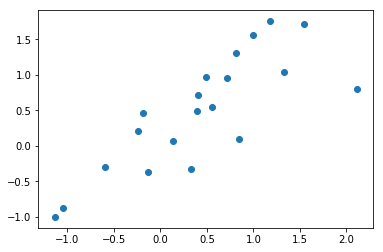

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
## mean
x_new=x-x.mean()
y_new=y-y.mean()

In [5]:
## cov
cov_matrix = np.cov(np.stack((x_new[:,0],y_new)))

In [6]:
cov_matrix

array([[ 0.68987485,  0.54157886],
       [ 0.54157886,  0.64964811]])

In [7]:
## eigvalue and eigvector
eig_val, eig_vec=np.linalg.eig(cov_matrix)

In [8]:
eig_val

array([ 1.2117137 ,  0.12780925])

In [9]:
eig_vec

array([[ 0.72010861, -0.69386137],
       [ 0.69386137,  0.72010861]])

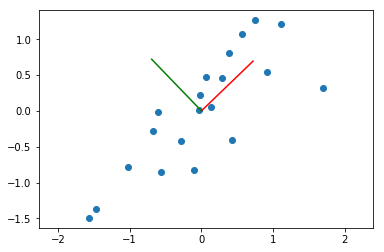

In [10]:
plt.plot(x_new,y_new,'o')
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='r')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='g')
plt.axis('equal')
plt.show()

In [11]:
new_axis_data=np.dot(np.transpose(np.stack((x_new[:,0],y_new))),eig_vec)

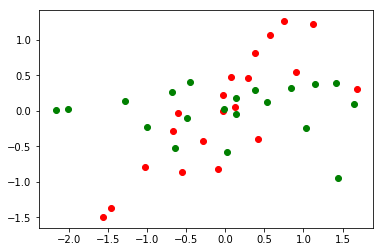

In [14]:
plt.scatter(np.transpose(np.stack((x_new[:,0],y_new)))[:,0],np.transpose(np.stack((x_new[:,0],y_new)))[:,1],c='r')
plt.scatter(new_axis_data[:,0],new_axis_data[:,1],c='g')
plt.show()

In [15]:
pca_one=np.dot(np.transpose(np.stack((x_new[:,0],y_new))),eig_vec[:,0])

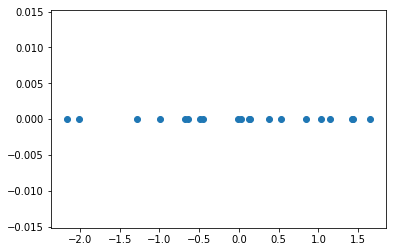

In [16]:
plt.scatter(pca_one,np.zeros((pca_one.shape)))
plt.show()

In [17]:
pca_two=np.dot(np.transpose(np.stack((x_new[:,0],y_new))),eig_vec[:,1])

In [18]:
pca_one

array([-2.0092986 ,  1.43621164, -0.49366437, -0.64295387,  0.13299383,
        1.1510518 ,  1.03533259, -2.16151861, -0.99663793,  0.83979774,
       -0.67871233,  0.38007845,  0.52873144,  0.13545859, -0.45550836,
        0.02711225, -1.27983591,  1.41850154, -0.01596664,  1.64882674])

In [19]:
pca_two

array([ 0.02882963, -0.94540149, -0.10275331, -0.52572019, -0.04837721,
        0.3789528 , -0.234691  ,  0.00934682, -0.23096494,  0.31698845,
        0.26038302,  0.29720736,  0.13022974,  0.17774399,  0.40826031,
       -0.5804778 ,  0.14486886,  0.38904308,  0.02314366,  0.10338822])

In [374]:
########### SKLEARN PCA ##############

In [20]:
from sklearn.decomposition import PCA
pca=PCA()

In [21]:
data=np.stack((x[:,0],y)).T
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.transform(data),pca_one,pca_two

(array([[ 2.0092986 , -0.02882963],
        [-1.43621164,  0.94540149],
        [ 0.49366437,  0.10275331],
        [ 0.64295387,  0.52572019],
        [-0.13299383,  0.04837721],
        [-1.1510518 , -0.3789528 ],
        [-1.03533259,  0.234691  ],
        [ 2.16151861, -0.00934682],
        [ 0.99663793,  0.23096494],
        [-0.83979774, -0.31698845],
        [ 0.67871233, -0.26038302],
        [-0.38007845, -0.29720736],
        [-0.52873144, -0.13022974],
        [-0.13545859, -0.17774399],
        [ 0.45550836, -0.40826031],
        [-0.02711225,  0.5804778 ],
        [ 1.27983591, -0.14486886],
        [-1.41850154, -0.38904308],
        [ 0.01596664, -0.02314366],
        [-1.64882674, -0.10338822]]),
 array([-2.0092986 ,  1.43621164, -0.49366437, -0.64295387,  0.13299383,
         1.1510518 ,  1.03533259, -2.16151861, -0.99663793,  0.83979774,
        -0.67871233,  0.38007845,  0.52873144,  0.13545859, -0.45550836,
         0.02711225, -1.27983591,  1.41850154, -0.01596664,

In [388]:
?PCA